In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.cm as c

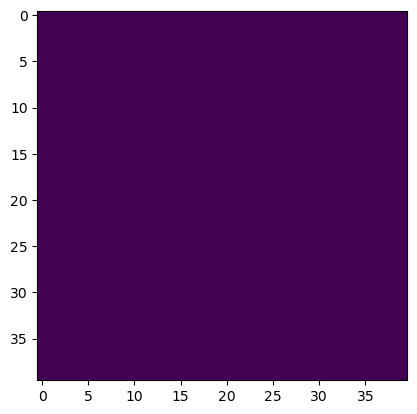

In [2]:
from scipy.ndimage import gaussian_filter
import cv2
heatmap = np.zeros((40,40))
plt.imshow(heatmap)

In [3]:
point = [33,26]
cv2.circle(heatmap, (point[0], point[1]), 1 , 1, cv2.FILLED)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

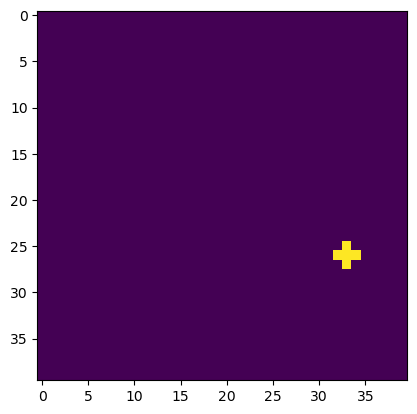

In [4]:
plt.imshow(heatmap)

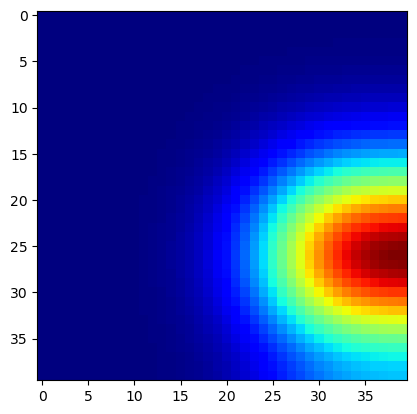

In [5]:
heatmap = gaussian_filter(heatmap, 7)
plt.imshow(heatmap,c.jet)

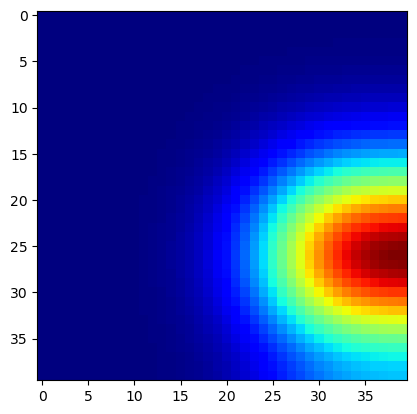

In [6]:
maxi = np.amax(heatmap)
heatmap = heatmap / maxi
plt.imshow(heatmap,c.jet)


In [15]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter

def apply_gaussian_to_point(img, point, sigma=10):
    """在指定点应用高斯分布"""
    x, y = np.meshgrid(np.linspace(0, 50, 50), np.linspace(0, 50, 50))
    d = np.sqrt((x - point[0])**2 + (y - point[1])**2)
    gauss = np.exp(-( (d)**2 / ( 2.0 * sigma**2 ) ))
    return gauss / gauss.max()

# 设置图像大小
img_size = (300, 300)

# 创建一个初始为黑色的图像
img = np.zeros((img_size[0], img_size[1], 3), dtype=np.uint8)

# 指定的多个点
points = [(25, 25), (75, 75), (125, 125)]  # 比如这里是三个点

# 应用高斯分布
for point in points:
    for i in range(0, img_size[0], 50):
        for j in range(0, img_size[1], 50):
            if i <= point[0] < i+50 and j <= point[1] < j+50:
                gauss_mask = apply_gaussian_to_point(img, (point[0] % 50, point[1] % 50))
                img[i:i+50, j:j+50, 0] = np.maximum(img[i:i+50, j:j+50, 0], (gauss_mask * 255).astype(np.uint8))

# 将NumPy数组转换为PIL图像并显示
img = Image.fromarray(img, 'RGB')
img.show()



In [16]:
from PIL import Image
import numpy as np

def apply_gaussian_to_point(img, point, intensity=255, sigma=10):
    """在指定点应用高斯分布"""
    x, y = np.meshgrid(np.linspace(0, 50, 50), np.linspace(0, 50, 50))
    d = np.sqrt((x - point[0])**2 + (y - point[1])**2)
    gauss = np.exp(-( (d)**2 / ( 2.0 * sigma**2 ) ))
    return gauss / gauss.max() * intensity

# 设置图像大小
img_size = (300, 300)

# 创建一个初始为黑色的图像
img = np.zeros((img_size[0], img_size[1], 3), dtype=np.uint8)

# 指定的多个点以及它们的深浅程度和扩散范围
points = [(25, 25, 255, 10), (75, 75, 200, 20), (125, 125, 150, 30)]  # 格式为(x, y, intensity, sigma)

# 应用高斯分布
for point in points:
    for i in range(0, img_size[0], 50):
        for j in range(0, img_size[1], 50):
            if i <= point[0] < i+50 and j <= point[1] < j+50:
                gauss_mask = apply_gaussian_to_point(img, (point[0] % 50, point[1] % 50), point[2], point[3])
                img[i:i+50, j:j+50, 0] = np.maximum(img[i:i+50, j:j+50, 0], gauss_mask.astype(np.uint8))

# 将NumPy数组转换为PIL图像并显示
img = Image.fromarray(img, 'RGB')
img.show()

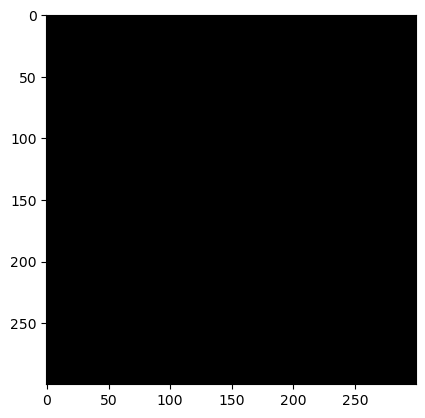

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from scipy.ndimage import gaussian_filter

# 创建或加载图像
img_size = (300, 300)
img = np.zeros((img_size[0], img_size[1], 3), dtype=np.uint8)

def apply_gaussian_to_point(x, y, sigma=15, intensity=255):
    """在指定点应用高斯分布"""
    gauss = np.zeros((img_size[0], img_size[1]))
    gauss[y, x] = intensity
    gauss = gaussian_filter(gauss, sigma=sigma)
    return np.clip(gauss, 0, 255)

def onclick(event):
    if event.xdata is not None and event.ydata is not None:
        # 获取点击坐标
        x, y = int(event.xdata), int(event.ydata)
        # 应用高斯分布
        gauss_mask = apply_gaussian_to_point(x, y)
        img[:, :, 0] = np.maximum(img[:, :, 0], gauss_mask.astype(np.uint8))
        # 更新显示
        ax.imshow(img)
        fig.canvas.draw()

# 显示图像并设置点击回调
fig, ax = plt.subplots()
ax.imshow(img)
cid = fig.canvas.mpl_connect('button_press_event', onclick)

plt.show()


In [20]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
from scipy.ndimage import gaussian_filter

# 创建一个空白图像
img_size = (300, 300)
img = np.zeros((img_size[0], img_size[1], 3), dtype=np.uint8)

fig, ax = plt.subplots()
ax.imshow(img)
points = []

def apply_gaussian_to_point(img, point, sigma=15):
    """在指定点应用高斯分布"""
    x, y = point
    gauss = np.zeros_like(img[:, :, 0], dtype=float)
    gauss[y, x] = 1
    gauss = gaussian_filter(gauss, sigma=sigma)
    max_val = gauss.max()
    if max_val > 0:
        gauss = (gauss / max_val) * 255
    return gauss

def onclick(event):
    if event.xdata is not None and event.ydata is not None:
        x, y = int(event.xdata), int(event.ydata)
        points.append((x, y))
        for point in points:
            gauss_mask = apply_gaussian_to_point(img, point)
            img[:, :, 0] = np.maximum(img[:, :, 0], gauss_mask.astype(np.uint8))
        ax.imshow(img)
        fig.canvas.draw()

# 连接事件处理函数
fig.canvas.mpl_connect('button_press_event', onclick)
plt.show()


<IPython.core.display.Javascript object>